## Data Preparation:

### Load and visualise the data

In [6]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

# Load the MNIST dataset from the provided CSV file
train_data = pd.read_csv("./digit-recognizer/train.csv")
print('train_data (rows, columns): ', train_data.shape)

# Separate the labels (target) and the pixel values
labels = train_data['label']
pixels = train_data.drop('label', axis=1)

train_data (rows, columns):  (42000, 785)


#### Afficher une image quelconque depuis le train en indiquant comme titre de l'image son label (càd le target associé)

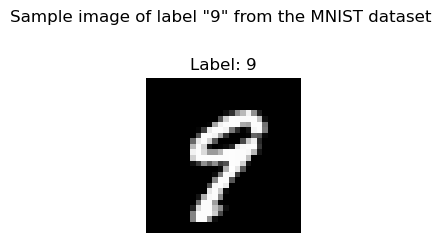

In [14]:
plt.figure(figsize=(2, 3))
imageLabel = random.randint(0, 9)
title = f'Sample image of label "{imageLabel}" from the MNIST dataset'
img = pixels[labels == imageLabel].iloc[0].values.reshape(28, 28) # 28x28 pixels
plt.imshow(img, cmap='gray')
plt.title(f"Label: {imageLabel}")
plt.axis('off')
plt.suptitle(title)
plt.show()

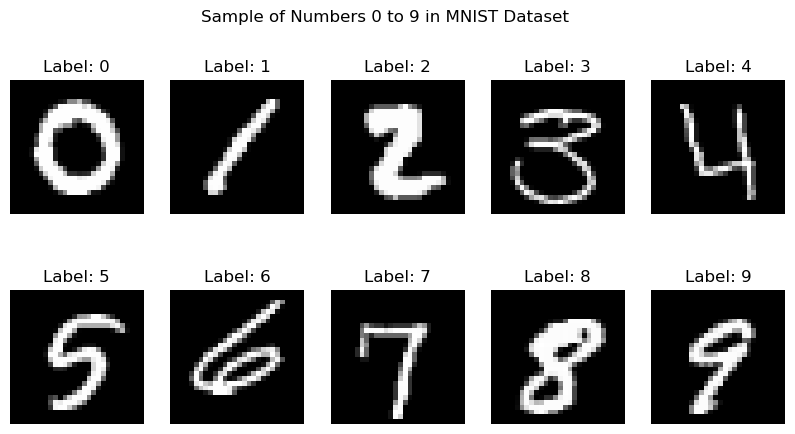

In [8]:
# Define a function to display images and labels
def show_mnist_images(images, labels, title):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        img = images[labels == i].iloc[0].values.reshape(28, 28) # 28x28 pixels
        plt.imshow(img, cmap='gray')
        plt.title(f"Label: {i}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Show a sample of numbers 0 to 9
show_mnist_images(pixels, labels, "Sample of Numbers 0 to 9 in MNIST Dataset")

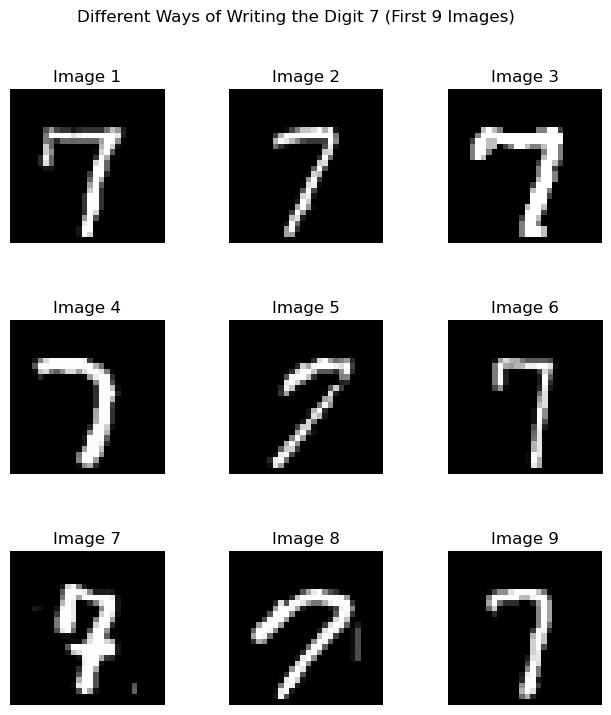

In [9]:
# Function to display the first 9 images of digit 7
def show_sevens(images, labels):
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    fig.subplots_adjust(hspace=0.5)
    sevens = images[labels == 7].values
    
    for i, ax in enumerate(axes.flat):
        img = sevens[i].reshape(28, 28)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"Image {i + 1}")
        ax.axis('off')

    plt.suptitle("Different Ways of Writing the Digit 7 (First 9 Images)")
    plt.show()

# Display the first 9 images of digit 7
show_sevens(pixels, labels)

### Afficher le représentant "moyen" de chaque chiffre

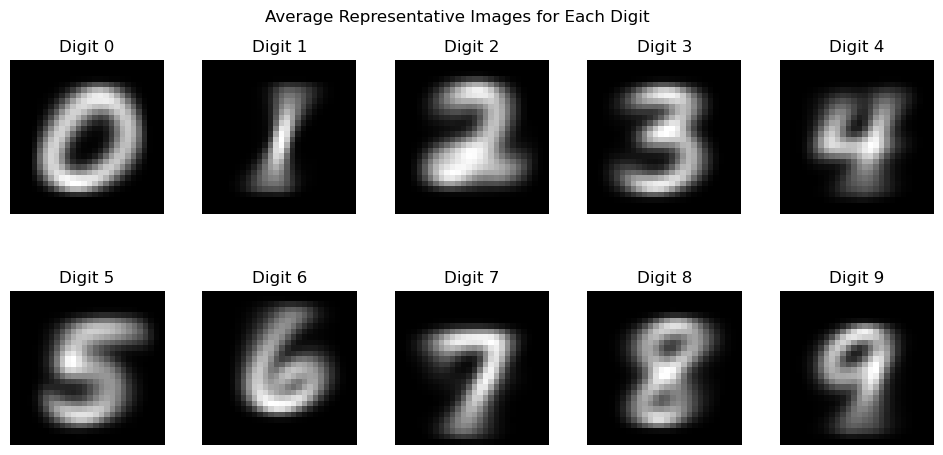

In [17]:
# Function to display the average representative image for each digit
def show_average_representatives(images, labels):
    fig, axes = plt.subplots(2, 5, figsize=(12, 5))
    fig.subplots_adjust(hspace=0.5)
    
    for i, ax in enumerate(axes.flat):
        digit_images = images[labels == i].values
        average_image = np.mean(digit_images, axis=0).reshape(28, 28)
        ax.imshow(average_image, cmap='gray')
        ax.set_title(f"Digit {i}")
        ax.axis('off')

    plt.suptitle("Average Representative Images for Each Digit")
    plt.show()

# Display the average representative image for each digit (0 to 9)
show_average_representatives(pixels, labels)

### Model Selection and Experimentation: